##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Data Gathering

In [ ]:
#ratings data
ratings = pd.read_csv('u.data', sep='\t', header=None)
ratings

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
columns=['userid','itemid','rating','timestamp']
ratings.columns = columns #change the column names
ratings

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
genere_data = pd.read_csv('u.genre', sep='\t', header=None)
genere_data.columns = ['genre']
genere_data #genre data 

,genre
0,unknown|0
1,Action|1
2,Adventure|2
3,Animation|3
4,Children's|4
5,Comedy|5
6,Crime|6
7,Documentary|7
8,Drama|8
9,Fantasy|9


In [ ]:
m_cols = ['movie_id','movie_title',' releasedate','video_release_date','IMDb_URL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary',
          'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [ ]:
items_data = pd.read_csv('u.item', sep='|', names=m_cols,encoding='latin-1')
items_data #items data

,movie_id,movie_title,releasedate,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Gathering Tweets from Twitter for each movies

In [ ]:
# consumer_key = 'pMq84oRsMyfwKfo2ZDKXGA4u3'
# consumer_secret = 'xWDiCDN7cFH4WjIu6RKgeg02686SiJOutzrd5ydb923jmwQeJz' 
# access_token = '443923951-mcnmfg76lKMKEYwHK5UKJe1fb6aw5fdRfinuW6iE'
# access_secret ='5U64BLfsSoQd2FBUR0cKu85zytfFxTKcr0WS7KFJeVo5J'

In [ ]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=False, compression=True)

In [ ]:
# movie_list = items_data.iloc[351:,1]

In [ ]:
# len(movie_list)

1331

In [ ]:
# import json

In [ ]:
# tweets_list=[]

In [ ]:
def create_tweets(movie_list):
  for name in movie_list:
    tw =[]
    tweets = tweepy.Cursor(api.search, q=name).items(100)
    for tweet in tweets:
      tw.append([tweet.id, tweet.created_at, tweet.user.id, tweet.text ])
    tweets_list.append([name,tw])
  with open("tweets.json", 'w') as f:
    json.dump(tweets_list, f, indent=4, sort_keys=True, default=str) 


In [ ]:
#create_tweets(movie_list) #tweets creating for movie list

In [ ]:
# with open("tweets_352.json", 'w') as f:
#   json.dump(tweets_list, f, indent=4, sort_keys=True, default=str) 

In [ ]:
# with open("tweets_352.json", 'r') as f:
#   Data_1 = json.load(f)

#Preprocessing Tweets

In [ ]:
tweets_list1=[]
tweets_list2=[]

In [ ]:
with open("tweets_350.json", 'r') as f:
    tweets_list1 = json.load(f)

with open("tweets_final.json", 'r') as f:
    tweets_list2 = json.load(f)

In [ ]:
def createDataframe(listval):

  df = pd.DataFrame()

  for name,val in listval:

    for id,created,user,text in val:
      df = df.append([[name,id,created,user,text]])

  
  return df






In [ ]:
df1 = createDataframe(tweets_list1)

In [ ]:
col_name = ["Movie Name","tweet-id", "tweet-created_at", "tweet-user.id", "tweet-text"]

In [ ]:
df1.columns = col_name

In [ ]:
df1

In [ ]:
df2 = createDataframe(tweets_list2)

In [ ]:
df2.columns = col_name
df2

In [ ]:
frames = [df1, df2]

tweets_df = pd.concat(frames)

In [ ]:
# tweets_df['tweet-id'] = tweets_df['tweet-id'].astype('uint64')
# tweets_df['tweet-user.id'] =tweets_df['tweet-user.id'].astype('uint64')

In [ ]:
import sys

In [ ]:
tweets_df.to_csv("tweets_data.csv",index=False)

In [ ]:
tweets_data = pd.read_csv("tweets_data.csv",dtype=str)
tweets_data

,Movie Name,tweet-id,tweet-created_at,tweet-user.id,tweet-text
0,Toy Story (1995),1552832529685745664,2022-07-29 01:44:59,1493974974251606016,VE ESTÁ PELÍCULA - Toy Story (1995) https://t....
1,Toy Story (1995),1552779238218108928,2022-07-28 22:13:14,1262126531456925696,"i woke up and told myself ""i'm gonna work all ..."
2,Toy Story (1995),1552751892178124800,2022-07-28 20:24:34,1071723668202577920,RT @behind_pics: Toy Story (1995) https://t.co...
3,Toy Story (1995),1552749651719323648,2022-07-28 20:15:40,1540490765587173384,RT @NoPlacement: Toy Story (1995) https://t.co...
4,Toy Story (1995),1552749353437216768,2022-07-28 20:14:29,1071723668202577920,RT @behind_pics: Toy Story (1995) https://t.co...
...,...,...,...,...,...
45562,You So Crazy (1994),1553072386580180994,2022-07-29 17:38:06,3238182820,RT @JacksonWang852: Thank you so much #Manila ...
45563,You So Crazy (1994),1552818192417972226,2022-07-29 00:48:01,859967127331196929,"@bigolgeeek Oh, so you're an old hoe doing all..."
45564,You So Crazy (1994),1552689484709371905,2022-07-28 16:16:35,940081975,RT @loldiaamond1: Jordan b wished death on jay...
45565,You So Crazy (1994),1550991943165001729,2022-07-23 23:51:09,1129570683078492167,"I know you guys would think that I’m crazy, I ..."


In [ ]:
tweets_data.isna().sum()

Movie Name          0
tweet-id            2
tweet-created_at    2
tweet-user.id       2
tweet-text          2
dtype: int64

In [ ]:
#remove tweet-id with null
tweets_data = tweets_data.dropna(axis=0, subset=['tweet-id'])

In [ ]:
#check for null values
tweets_data.isna().sum()

Movie Name          0
tweet-id            0
tweet-created_at    0
tweet-user.id       0
tweet-text          0
dtype: int64

#Data Cleaning

In [ ]:
#clean the comments in data

import string
import re
import nltk
from nltk.tokenize import TweetTokenizer
tweet_list = []

def clean_text(text):
    #remove @username
    text_nousrname = re.sub('@[^\s]+','',text)
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text_nousrname)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    #remove words with less than 2 words
    text_no_wordlen2 = re.sub(r'\b\w{1,3}\b', '', text_no_doublespace)
    #remove emoticons etc
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    text_nosymbl = emoji_pattern.sub(r'', text_no_wordlen2)
    #remove ...
    text_nodot = text_nosymbl.replace('\u2026','')
    #remove ASCII characters
    text_noascii = ''.join([c for c in text_nodot if ord(c) < 128])
    return text_noascii


##Creating cleaned tweets from retrieved tweets

In [ ]:
tweets_data['Cleaned_tweets'] = tweets_data['tweet-text'].apply(lambda x: clean_text(x))
tweets_data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Movie Name,tweet-id,tweet-created_at,tweet-user.id,tweet-text,Cleaned_tweets
0,Toy Story (1995),1552832529685745664,2022-07-29 01:44:59,1493974974251606016,VE ESTÁ PELÍCULA - Toy Story (1995) https://t....,est pelcula story httpstcoydhvxgsat
1,Toy Story (1995),1552779238218108928,2022-07-28 22:13:14,1262126531456925696,"i woke up and told myself ""i'm gonna work all ...",woke told myself gonna work night long r...
2,Toy Story (1995),1552751892178124800,2022-07-28 20:24:34,1071723668202577920,RT @behind_pics: Toy Story (1995) https://t.co...,story httpstcouefafps
3,Toy Story (1995),1552749651719323648,2022-07-28 20:15:40,1540490765587173384,RT @NoPlacement: Toy Story (1995) https://t.co...,story httpstcokylnoplb
4,Toy Story (1995),1552749353437216768,2022-07-28 20:14:29,1071723668202577920,RT @behind_pics: Toy Story (1995) https://t.co...,story httpstcodbjjiynce
5,Toy Story (1995),1552745457755078659,2022-07-28 19:59:00,272843769,1995\nLa jungla 3\nToy Story\nSeven\nEl día de...,jungla story seven bestia mars attacks ...
6,Toy Story (1995),1552733694141538309,2022-07-28 19:12:15,1293708788663549958,"Toy Story 1, and it’s not even close\n\nThis m...",story even close this movie literally push...
7,Toy Story (1995),1552704196327219213,2022-07-28 17:15:02,1399137433690820612,RT @behind_pics: Toy Story (1995) https://t.co...,story httpstcouefafps
8,Toy Story (1995),1552703301308784646,2022-07-28 17:11:29,1399137433690820612,RT @behind_pics: Toy Story (1995) https://t.co...,story httpstcodbjjiynce
9,Toy Story (1995),1552692660753743872,2022-07-28 16:29:12,387158466,Damn #Lightyear flopped hard af…it made less m...,damn lightyear flopped hard made less money t...


## Average tweets per movie

In [ ]:
tweets_movies = tweets_data.groupby(['Movie Name'],as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
avg_tweets = tweets_data.groupby('Movie Name').agg(avg_tweets=('tweet-id','count')).reset_index()
avg_tweets

,Movie Name,avg_tweets
0,'Til There Was You (1997),2
1,1-900 (1994),40
2,101 Dalmatians (1996),34
3,12 Angry Men (1957),100
4,187 (1997),32
...,...,...
1296,Young Frankenstein (1974),65
1297,Young Guns (1988),14
1298,Young Guns II (1990),18
1299,Zeus and Roxanne (1997),2


##Average ratings per movie

In [ ]:
u_data = ratings

In [ ]:
movies_average_rating=u_data.groupby('itemid')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,itemid,Average Rating
0,814,5.0
1,1599,5.0
2,1201,5.0
3,1122,5.0
4,1653,5.0


In [ ]:
movies_rating_count=u_data.groupby('itemid')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='itemid')
movies_rating_count_avg.head()

,itemid,Rating Count,Average Rating
0,1682,1,3.0
1,814,1,5.0
2,1447,1,3.0
3,1593,1,4.0
4,1452,1,4.0


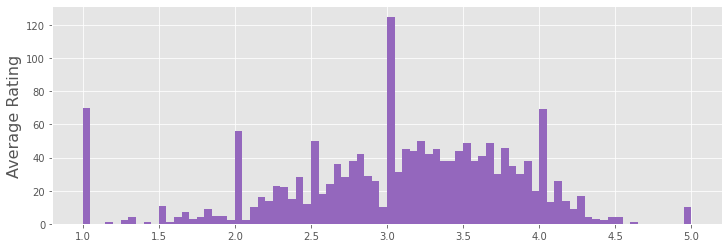

In [ ]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80,color='tab:purple')
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('avgratinghist.jpg')

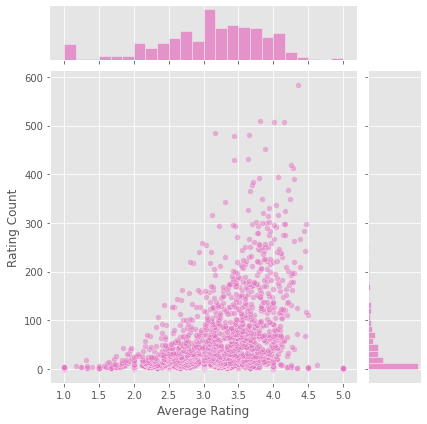

In [ ]:

plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5, color='tab:pink')
plot.savefig('joinplot.jpg')

##Highest number of ratings for a movie 

In [ ]:
import plotly.express as px

In [ ]:
top_number_ratings_movie = movies_rating_count_avg.nlargest(10,'Rating Count')
top_number_ratings_movie

,itemid,Rating Count,Average Rating
1681,50,583,4.358491
1680,258,509,3.803536
1679,100,508,4.155512
1678,181,507,4.007890
1677,294,485,3.156701
1676,286,481,3.656965
1675,288,478,3.441423
1674,1,452,3.878319
1673,300,431,3.631090
1672,121,429,3.438228


In [ ]:
top_number_ratings_movie = top_number_ratings_movie.rename(columns={'itemid':'movie_id'})
top_number_ratings_movie

,movie_id,Rating Count,Average Rating
1681,50,583,4.358491
1680,258,509,3.803536
1679,100,508,4.155512
1678,181,507,4.007890
1677,294,485,3.156701
1676,286,481,3.656965
1675,288,478,3.441423
1674,1,452,3.878319
1673,300,431,3.631090
1672,121,429,3.438228


In [ ]:
items_data_movie_title = items_data[['movie_id','movie_title']]
items_data_movie_title

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [ ]:
#merge the toprating movie
top_number_ratings_movie_data = pd.merge(top_number_ratings_movie,items_data_movie_title, how="inner", on=["movie_id"])
top_number_ratings_movie_data

,movie_id,Rating Count,Average Rating,movie_title
0,50,583,4.358491,Star Wars (1977)
1,258,509,3.803536,Contact (1997)
2,100,508,4.155512,Fargo (1996)
3,181,507,4.007890,Return of the Jedi (1983)
4,294,485,3.156701,Liar Liar (1997)
5,286,481,3.656965,"English Patient, The (1996)"
6,288,478,3.441423,Scream (1996)
7,1,452,3.878319,Toy Story (1995)
8,300,431,3.631090,Air Force One (1997)
9,121,429,3.438228,Independence Day (ID4) (1996)


In [ ]:
px.bar(data_frame=top_number_ratings_movie_data,x='movie_title',y='Rating Count',title='Highest number of ratings for a movie')

## Lowest number of ratings for a movie

In [ ]:
lowest_number_ratings_movie = movies_rating_count_avg.nsmallest(10,'Rating Count')
lowest_number_ratings_movie

,itemid,Rating Count,Average Rating
0,1682,1,3.0
1,814,1,5.0
2,1447,1,3.0
3,1593,1,4.0
4,1452,1,4.0
5,1453,1,2.0
6,1457,1,3.0
7,1458,1,4.0
8,1460,1,3.0
9,1461,1,2.0


In [ ]:
lowest_number_ratings_movie = lowest_number_ratings_movie.rename(columns={'itemid':'movie_id'})
lowest_number_ratings_movie

,movie_id,Rating Count,Average Rating
0,1682,1,3.0
1,814,1,5.0
2,1447,1,3.0
3,1593,1,4.0
4,1452,1,4.0
5,1453,1,2.0
6,1457,1,3.0
7,1458,1,4.0
8,1460,1,3.0
9,1461,1,2.0


In [ ]:
lowest_number_ratings_movie_data = pd.merge(lowest_number_ratings_movie,items_data_movie_title, how="inner", on=["movie_id"])
lowest_number_ratings_movie_data

,movie_id,Rating Count,Average Rating,movie_title
0,1682,1,3.0,Scream of Stone (Schrei aus Stein) (1991)
1,814,1,5.0,"Great Day in Harlem, A (1994)"
2,1447,1,3.0,Century (1993)
3,1593,1,4.0,Death in Brunswick (1991)
4,1452,1,4.0,Lady of Burlesque (1943)
5,1453,1,2.0,Angel on My Shoulder (1946)
6,1457,1,3.0,Love Is All There Is (1996)
7,1458,1,4.0,"Damsel in Distress, A (1937)"
8,1460,1,3.0,Sleepover (1995)
9,1461,1,2.0,Here Comes Cookie (1935)


In [ ]:
px.bar(data_frame=lowest_number_ratings_movie_data,x='movie_title',y='Rating Count',title='Lowest number of ratings for a movie')

#Sentimental Analysis using Vader

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 8.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#calling vader object
sid_obj = SentimentIntensityAnalyzer()

#vader polarity score as mentioned as scores
tweets_data['scores'] = tweets_data['Cleaned_tweets'].apply(lambda review: sid_obj.polarity_scores(review))

tweets_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Movie Name,tweet-id,tweet-created_at,tweet-user.id,tweet-text,Cleaned_tweets,scores
0,Toy Story (1995),1552832529685745664,2022-07-29 01:44:59,1493974974251606016,VE ESTÁ PELÍCULA - Toy Story (1995) https://t....,est pelcula story httpstcoydhvxgsat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Toy Story (1995),1552779238218108928,2022-07-28 22:13:14,1262126531456925696,"i woke up and told myself ""i'm gonna work all ...",woke told myself gonna work night long r...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Toy Story (1995),1552751892178124800,2022-07-28 20:24:34,1071723668202577920,RT @behind_pics: Toy Story (1995) https://t.co...,story httpstcouefafps,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Toy Story (1995),1552749651719323648,2022-07-28 20:15:40,1540490765587173384,RT @NoPlacement: Toy Story (1995) https://t.co...,story httpstcokylnoplb,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Toy Story (1995),1552749353437216768,2022-07-28 20:14:29,1071723668202577920,RT @behind_pics: Toy Story (1995) https://t.co...,story httpstcodbjjiynce,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


##Sentiment Score for each tweets

In [ ]:
tweets_data['sentiment score']  = tweets_data['scores'].apply(lambda score_dict: score_dict['compound'])

tweets_data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Movie Name,tweet-id,tweet-created_at,tweet-user.id,tweet-text,Cleaned_tweets,scores,sentiment score
0,Toy Story (1995),1552832529685745664,2022-07-29 01:44:59,1493974974251606016,VE ESTÁ PELÍCULA - Toy Story (1995) https://t....,est pelcula story httpstcoydhvxgsat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
1,Toy Story (1995),1552779238218108928,2022-07-28 22:13:14,1262126531456925696,"i woke up and told myself ""i'm gonna work all ...",woke told myself gonna work night long r...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,Toy Story (1995),1552751892178124800,2022-07-28 20:24:34,1071723668202577920,RT @behind_pics: Toy Story (1995) https://t.co...,story httpstcouefafps,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,Toy Story (1995),1552749651719323648,2022-07-28 20:15:40,1540490765587173384,RT @NoPlacement: Toy Story (1995) https://t.co...,story httpstcokylnoplb,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,Toy Story (1995),1552749353437216768,2022-07-28 20:14:29,1071723668202577920,RT @behind_pics: Toy Story (1995) https://t.co...,story httpstcodbjjiynce,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


##Average Sentiment score for each movie

In [ ]:
tweets_movies = tweets_data.groupby(['Movie Name'],as_index=False).mean()

In [ ]:

tweets_movies

,Movie Name,sentiment score
0,'Til There Was You (1997),0.484200
1,1-900 (1994),0.076305
2,101 Dalmatians (1996),0.271391
3,12 Angry Men (1957),-0.203945
4,187 (1997),-0.001134
...,...,...
1296,Young Frankenstein (1974),0.027522
1297,Young Guns (1988),-0.220629
1298,Young Guns II (1990),0.410900
1299,Zeus and Roxanne (1997),0.000000


In [ ]:
#sort the score values
tweets_movies.sort_values(by='sentiment score')

,Movie Name,sentiment score
383,Evil Dead II (1987),-0.871322
406,Fatal Instinct (1993),-0.851900
405,Faster Pussycat! Kill! Kill! (1965),-0.845141
1156,They Made Me a Criminal (1939),-0.827100
799,Mrs. Parker and the Vicious Circle (1994),-0.796400
...,...,...
134,Best of the Best 3: No Turning Back (1995),0.855500
260,Cobb (1994),0.855500
620,Jean de Florette (1986),0.865800
408,Fathers' Day (1997),0.902200


In [ ]:
tweets_movies = tweets_movies.rename(columns={'Movie_Name':'movie_title','sentiment score':'sentiment_score'})
tweets_movies

,Movie Name,sentiment_score
0,'Til There Was You (1997),0.484200
1,1-900 (1994),0.076305
2,101 Dalmatians (1996),0.271391
3,12 Angry Men (1957),-0.203945
4,187 (1997),-0.001134
...,...,...
1296,Young Frankenstein (1974),0.027522
1297,Young Guns (1988),-0.220629
1298,Young Guns II (1990),0.410900
1299,Zeus and Roxanne (1997),0.000000


##Highest Average Sentiment scored Movies

In [ ]:
positive_movies_data = tweets_movies.nlargest(10,"sentiment_score")
positive_movies_data

,Movie Name,sentiment_score
397,Falling in Love Again (1980),0.908100
408,Fathers' Day (1997),0.902200
620,Jean de Florette (1986),0.865800
134,Best of the Best 3: No Turning Back (1995),0.855500
260,Cobb (1994),0.855500
712,Love! Valour! Compassion! (1997),0.851900
1273,"Whole Wide World, The (1996)",0.831300
200,Bullets Over Broadway (1994),0.812075
120,Beautiful Thing (1996),0.804490
505,Grace of My Heart (1996),0.803450


In [ ]:
px.line(data_frame=positive_movies_data,x='Movie Name',y='sentiment_score',title='Highest Average Sentiment scored Movies')

##Lowest Sentiment Scored movie

In [ ]:
Lowest_sentiment_score_movies = tweets_movies.nsmallest(10,'sentiment_score')
Lowest_sentiment_score_movies

,Movie Name,sentiment_score
383,Evil Dead II (1987),-0.871322
406,Fatal Instinct (1993),-0.851900
405,Faster Pussycat! Kill! Kill! (1965),-0.845141
1156,They Made Me a Criminal (1939),-0.827100
799,Mrs. Parker and the Vicious Circle (1994),-0.796400
1200,Trial by Jury (1994),-0.790600
995,Rosencrantz and Guildenstern Are Dead (1990),-0.784500
1030,"Sex, Lies, and Videotape (1989)",-0.769621
622,"Jerky Boys, The (1994)",-0.718400
1271,White Man's Burden (1995),-0.700300


In [ ]:
px.line(data_frame=Lowest_sentiment_score_movies,x='Movie Name',y='sentiment_score',title='Lowest average sentiment scored movies')

In [ ]:
tweets_movies.to_csv("tweets_movie_sentiment",index=False)

#Building the Collaborative filtering-based recommender system

###Algorithm to be used: Matrix factorization 
###Dataset to be used: u.data

##Collaborative Filtering uses the "wisdom of the crowd" to recommend.

In [ ]:
u_data = ratings
u_data

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
u_data.shape

(100000, 4)

In [ ]:
u_data.isnull().sum()

userid       0
itemid       0
rating       0
timestamp    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, valid_df = train_test_split(u_data, test_size=0.2)

In [ ]:
train_df.shape , valid_df.shape

((80000, 4), (20000, 4))

In [ ]:
train_df

,userid,itemid,rating,timestamp
14194,222,399,4,878182686
90717,816,678,4,891710837
57929,806,204,5,882388205
24675,263,174,5,891299697
74165,747,12,4,888639272
...,...,...,...,...
92800,899,8,4,884121572
77851,897,68,5,879994113
26977,527,956,4,879455847
68704,877,538,4,882676533


In [ ]:
train_df = train_df.reset_index(drop=True)
test_df = valid_df.reset_index(drop=True)

In [ ]:
train_df

,userid,itemid,rating,timestamp
0,222,399,4,878182686
1,816,678,4,891710837
2,806,204,5,882388205
3,263,174,5,891299697
4,747,12,4,888639272
...,...,...,...,...
79995,899,8,4,884121572
79996,897,68,5,879994113
79997,527,956,4,879455847
79998,877,538,4,882676533


##Embedding Layer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# embedding will be initialized at random
embed = nn.Embedding(10, 3)
# given a list of ids wthe embedding corresponing to each id
a = torch.LongTensor([[1,2,0,4,5,1]])
embed(a)

tensor([[[ 0.5045, -0.1947,  0.5750],
         [-0.6589, -0.0785, -1.8040],
         [ 1.8174,  1.3995,  0.9336],
         [ 1.2078, -0.1813, -1.2235],
         [-0.6630,  0.3709,  0.6866],
         [ 0.5045, -0.1947,  0.5750]]], grad_fn=<EmbeddingBackward0>)

##Matrix Factroization Model

In [ ]:
class MatrixF(nn.Module):
    def __init__(self, num_users, num_items, emb_size=100):
        super(MatrixF, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.item_emb = nn.Embedding(num_items, emb_size)
        self.user_emb.weight.data.uniform_(0, 0.05)
        self.item_emb.weight.data.uniform_(0, 0.05)
        
    def forward(self, u, v):
        u = self.user_emb(u)
        v = self.item_emb(v)
        return (u*v).sum(1)  

##Training Matrix Factorization Model

In [ ]:
num_users = len(train_df.userid)
num_movie_items = len(train_df)
print(num_users, num_movie_items) 

80000 80000


##Matrix Factorization using Latent feature = 20

In [ ]:
mfModel_20 = MatrixF(num_users, num_movie_items, emb_size=20)
mfModel_20

MatrixF(
  (user_emb): Embedding(80000, 20)
  (item_emb): Embedding(80000, 20)
)

In [ ]:

def train_epocs(model, epochs=10, lr=0.01, wd=0.0, unsqueeze=False):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    model.train()
    for i in range(epochs):
        users = torch.LongTensor(train_df.userid.values) # .cuda()
        items = torch.LongTensor(train_df.itemid.values) #.cuda()
        ratings = torch.FloatTensor(train_df.rating.values) #.cuda()
        if unsqueeze:
            ratings = ratings.unsqueeze(1)
        y_hat = model(users, items)
        loss = F.mse_loss(y_hat, ratings)
        train_mse.append((i, loss.item()))
        if (i+1) % 10 == 0:
          print("Iteration: %d ; error = %.4f" % (i+1, loss.item()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    test_loss(model, unsqueeze)

In [ ]:
def test_loss(model, unsqueeze=False):
    model.eval()
    users = torch.LongTensor(test_df.userid.values) #.cuda()
    items = torch.LongTensor(test_df.itemid.values) #.cuda()
    ratings = torch.FloatTensor(test_df.rating.values) #.cuda()
    if unsqueeze:
        ratings = ratings.unsqueeze(1)
    y_hat = model(users, items)
    loss = F.mse_loss(y_hat, ratings)
    print("test loss %.3f " % loss.item())

In [ ]:
train_mse = []
train_epocs(mfModel_20, epochs=20, lr=0.01)

Iteration: 10 ; error = 11.9200
Iteration: 20 ; error = 7.6728
test loss 7.172 


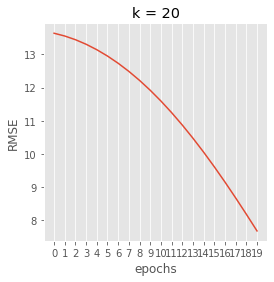

In [ ]:
x = [x for x, y in train_mse]
y = [y for x, y in train_mse]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 20")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

##Matrix Factorization with latent feature K= 30

In [ ]:
mfModel_30 = MatrixF(num_users, num_movie_items, emb_size=30)
train_mse = []
train_epocs(mfModel_30, epochs=20, lr=0.01)

Iteration: 10 ; error = 11.0585
Iteration: 20 ; error = 5.4010
test loss 4.823 


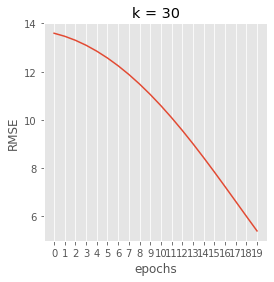

In [ ]:
x = [x for x, y in train_mse]
y = [y for x, y in train_mse]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 30")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

##Matrix Factorization with latent feature K= 40

In [ ]:
mfModel_40 = MatrixF(num_users, num_movie_items, emb_size=40)
train_mse = []
train_epocs(mfModel_40, epochs=20, lr=0.01)

Iteration: 10 ; error = 10.2441
Iteration: 20 ; error = 3.6532
test loss 3.108 


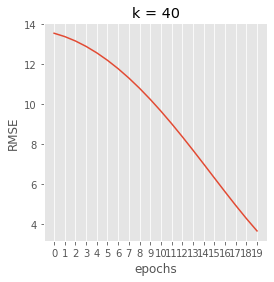

In [ ]:
x = [x for x, y in train_mse]
y = [y for x, y in train_mse]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 40")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

##Matrix Factorization with latent feature K= 50

In [ ]:
mfModel_50 = MatrixF(num_users, num_movie_items, emb_size=50)
train_mse = []
train_epocs(mfModel_50, epochs=20, lr=0.01)

Iteration: 10 ; error = 9.4560
Iteration: 20 ; error = 2.3909
test loss 1.969 


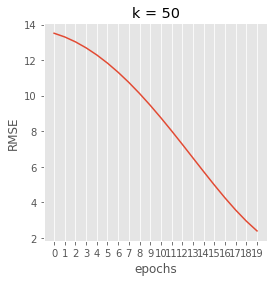

In [ ]:
x = [x for x, y in train_mse]
y = [y for x, y in train_mse]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 50")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

###From model experiment , we can see the latent feature ,K=50 has less rmse and model_50 is the best model

##Model prediction

In [ ]:
#predict the ratings for user 5

user = torch.tensor([5])
movie = torch.tensor(u_data['itemid'].unique().tolist())
predictions = mfModel_50(user, movie).tolist()
print(predictions)

[2.67366361618042, 2.7077696323394775, 2.5114035606384277, 2.647676944732666, 2.6722922325134277, 2.703892230987549, 2.71844744682312, 2.7034473419189453, 2.624603033065796, 2.654174327850342, 2.670908212661743, 2.6982617378234863, 2.710632801055908, 2.6590704917907715, 2.63384747505188, 2.6758687496185303, 2.6761252880096436, 2.650397300720215, 2.7085659503936768, 2.6319615840911865, 2.6686511039733887, 2.699941873550415, 2.6931169033050537, 2.6872472763061523, 2.6980085372924805, 2.6647536754608154, 2.680485725402832, 2.6303322315216064, 2.704845666885376, 2.697699785232544, 2.7228546142578125, 2.7579588890075684, 2.6906299591064453, 2.654094934463501, 2.726816177368164, 2.677264928817749, 2.698096513748169, 2.6784920692443848, 2.6980984210968018, 2.6792311668395996, 2.6720242500305176, 2.6463799476623535, 2.539799928665161, 2.659109354019165, 2.678255558013916, 2.712296962738037, 2.6761631965637207, 2.678703546524048, 2.630354166030884, 2.7007851600646973, 2.688063144683838, 2.67498

In [ ]:
predictions = np.array(predictions, dtype=np.float32)
sortedIndices = predictions.argsort()
sortedIndices

array([1680, 1585, 1298, ...,   31,  240,  512])

###TOP 10 Reccomeded Movies for user 5

In [ ]:
sortedIndices = predictions.argsort()
recommded_itemid = u_data['itemid'].unique()[sortedIndices][-10:][::-1]  # taking top 10
print(recommded_itemid)

[ 285  357   98  904  494 1398  479  251   61  941]


In [ ]:
recommendedMovies = items_data[items_data.movie_id.isin(recommded_itemid)]
top10k = pd.DataFrame(recommendedMovies['movie_title'])
top10k =top10k.reset_index(drop=True)
top10k = top10k.reset_index()
top10k = top10k.rename(columns={'index':'top 10'})
top10k

,top 10,movie_title
0,0,Three Colors: White (1994)
1,1,"Silence of the Lambs, The (1991)"
2,2,Shall We Dance? (1996)
3,3,Secrets & Lies (1996)
4,4,One Flew Over the Cuckoo's Nest (1975)
5,5,Vertigo (1958)
6,6,His Girl Friday (1940)
7,7,Ma vie en rose (My Life in Pink) (1997)
8,8,With Honors (1994)
9,9,Anna (1996)


In [ ]:
px.line(top10k,x='top 10',y='movie_title',width=600)

###TOP 20 Recomendation for user 5 

In [ ]:
sortedIndices_20 = predictions.argsort()
recommded_itemid_20 = u_data['itemid'].unique()[sortedIndices_20][-20:][::-1] # taking top 30
print(recommded_itemid_20)

[ 285  357   98  904  494 1398  479  251   61  941  150  813  923 1482
  589  190  238  183 1189  297]


In [ ]:
recommendedMovies_20 = items_data[items_data.movie_id.isin(recommded_itemid_20)]
top20k = pd.DataFrame(recommendedMovies_20['movie_title'])
top20k =top20k.reset_index(drop=True)
top20k = top20k.reset_index()
top20k = top20k.rename(columns={'index':'top 20'})
px.line(top20k,x='top 20',y='movie_title',width=600)

##Evaluation Metrics

###RMSE and MAE for top 10 predcition for user 5

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
#rmse and mae

user_5_df_mf = u_data
u_nump_mf = user_5_df_mf.to_numpy()[:,2]

valid_rating_10_mf = []

for i in sortedIndices[-10:][::-1]:
  try:
    valid_rating_10_mf.append(u_nump_mf[i])
  except:
    valid_rating_10_mf.append(0)
    continue

In [ ]:
valid_rating_10_mf

[5, 4, 4, 5, 3, 2, 2, 4, 4, 4]

In [ ]:
pred_rating_10_mf = []

for i in sortedIndices[-10:][::-1]:
  try:
    pred_rating_10_mf.append(predictions[i])
  except:
    pred_rating_10_mf.append(0)
    continue

In [ ]:
len(pred_rating_10_mf),len(valid_rating_10_mf)

(10, 10)

In [ ]:
mean_squared_error(pred_rating_10_mf,valid_rating_10_mf)

1.9021052392612945

In [ ]:
mean_absolute_error(pred_rating_10_mf,valid_rating_10_mf)

1.2473530054092408

###These metrics are Binary classifcation evaluation metrics and have to be converted the rating to 0 or 1. 
###The threshold we set to make the movie items are valid or invalid is 3.0 

###If the rating val is greater than 3.0 the movie item is valid to user therwise invalid.

### Valid movie items are already known in the data set
###Valid movie item: Has a True/Actual rating >= 3.0
###Invalid item: Has a True/Actual rating < 3.0
###Recommended items are generated by recommendation algorithm
###Recommended movie item: has a predicted rating >= 3.0
###Not recommended item: Has a predicted rating < 3.0

###For top k recommend algorithm the formula for precison ,recall and f1score is 

### Precision@k = (recommended items @k that are valid) / (recommended items @k)

###Recall@k = (recommended movie items @k that are valid) / (total of valid items)

###f1 score = 2*((precison * recall)/(precison +recall))

In [ ]:
user_5_df_mf = u_data[u_data.userid==5]
u_nump_mf = user_5_df_mf.to_numpy()[:,2]

recommended_mf_10 = 0

for i in sortedIndices[-10:][::-1]:
  try:
    if(predictions[i] >=3):
      recommended_mf_10 +=1
      print(u_data['itemid'][i])
  except:
    continue

In [ ]:
recommended_mf_10

0

In [ ]:
user_5_df_mf = u_data[u_data.userid==5]
u_nump_mf = user_5_df_mf.to_numpy()[:,2]

valid_rated_mf_10 = 0

for i in sortedIndices[-10:][::-1]:
  try:
    if(u_nump_mf[i] >=3):
      valid_rated_mf_10 +=1
      print(u_data['itemid'][i])
  except:
    continue

385


In [ ]:
valid_rated_mf_10

1

In [ ]:
## Precision@k = (recommended items @k that are valid) / (recommended items @k)

#recommended items @10 that are valid= 0
#recommended items @10 = 10

#precision = 1/10 = 10%

###Recall@k = (recommended movie items @k that are valid) / (total of valid items)
#recall = 2/2 = 0

###f1 score = 2*((precison * recall)/(precison +recall)) = 0

###Metric for Top 20 recommendation

In [ ]:
user_5_df_mf = u_data[u_data.userid==5]
u_nump_mf = user_5_df_mf.to_numpy()[:,2]

recommended_mf_20 = 0

for i in sortedIndices_20[-20:][::-1]:
  try:
    if(predictions[i] >=2):
      recommended_mf_20 +=1
      print(u_data['itemid'][i])
  except:
    continue

742
554
98
128
272
1047
385
150
177
640
709
234
486
410
187
278
218
7
125
194


In [ ]:
recommended_mf_20

20

In [ ]:
user_5_df_mf = u_data[u_data.userid==5]
u_nump_mf = user_5_df_mf.to_numpy()[:,2]

valid_rated_mf_20 = 0

for i in sortedIndices_20[-20:][::-1]:
  try:
    if(u_nump_mf[i] >=3):
      valid_rated_mf_20 +=1
      print(u_data['itemid'][i])
  except:
    continue

385


In [ ]:
u_nump_mf

array([3, 4, 1, 2, 1, 1, 1, 4, 3, 3, 3, 4, 5, 2, 4, 2, 1, 3, 4, 4, 2, 3,
       4, 3, 2, 3, 4, 1, 3, 4, 1, 2, 3, 5, 5, 4, 3, 4, 3, 5, 3, 1, 1, 5,
       3, 2, 4, 2, 2, 1, 5, 3, 1, 3, 1, 1, 3, 3, 3, 3, 4, 3, 1, 3, 1, 3,
       2, 3, 5, 1, 2, 5, 3, 5, 1, 1, 1, 1, 4, 3, 1, 5, 4, 3, 1, 3, 3, 3,
       1, 5, 4, 2, 3, 5, 3, 4, 5, 3, 1, 5, 4, 4, 2, 4, 1, 4, 1, 2, 5, 5,
       4, 3, 1, 3, 4, 5, 1, 1, 4, 1, 2, 5, 3, 4, 1, 3, 1, 1, 5, 2, 4, 1,
       3, 1, 3, 3, 5, 3, 1, 2, 2, 1, 4, 5, 3, 4, 3, 1, 5, 4, 1, 4, 2, 1,
       3, 4, 3, 5, 1, 5, 3, 5, 2, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 1, 5])

In [ ]:
## Precision@k = (recommended items @k that are valid) / (recommended items @k)

#recommended items @10 that are valid= 3
#recommended items @10 = 0 or it has 1

#precision = 0

###Recall@k = (recommended movie items @k that are valid) / (total of valid items)
#recall = 1/3 = 0.33%

###f1 score = 2*((precison * recall)/(precison +recall)) = 0.4

#Building the Hybrid Recommender System with neural networks

###A hybrid recommendation system is a special type of recommendation system which can be considered as the combination of the content and collaborative filtering method. We using Neural collaborative filtering to impliment hybrid recommender system and it will build using pytorch 

##To build the Hybrid Recommender System, we are combining the following:
i) Movie Ratings from u.data
ii) Movie genre information from u.item
iii) Movie sentiment from calculated from Twitter

In [ ]:
#ratings data
ratings_data = ratings
ratings_data

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
items_df = items_data
items_df

,movie_id,movie_title,releasedate,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
items_df.isnull().sum()

movie_id                 0
movie_title              0
 releasedate             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Childrens                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [ ]:
items_df_1 = items_df[['movie_id','movie_title','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary',
          'Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]

In [ ]:
items_df_1


,movie_id,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_sentiment = tweets_movies
movie_sentiment

,Movie Name,sentiment_score
0,'Til There Was You (1997),0.484200
1,1-900 (1994),0.076305
2,101 Dalmatians (1996),0.271391
3,12 Angry Men (1957),-0.203945
4,187 (1997),-0.001134
...,...,...
1296,Young Frankenstein (1974),0.027522
1297,Young Guns (1988),-0.220629
1298,Young Guns II (1990),0.410900
1299,Zeus and Roxanne (1997),0.000000


In [ ]:
dataset = ratings_data.iloc[:,:3]
dataset

,userid,itemid,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [ ]:
dataset.rename(columns = {'itemid':'movie_id'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset

,userid,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [ ]:
#merging the dataset with items data

result_data = pd.merge(dataset, items_df_1, how="inner", on=["movie_id"])
result_data

,userid,movie_id,rating,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,"Eighth Day, The (1996)",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,Girls Town (1996),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movie_sentiment.rename(columns = {'Movie Name':'movie_title','sentiment score':'sentiment_score'}, inplace = True)


In [ ]:
movie_sentiment

,movie_title,sentiment_score
0,'Til There Was You (1997),0.484200
1,1-900 (1994),0.076305
2,101 Dalmatians (1996),0.271391
3,12 Angry Men (1957),-0.203945
4,187 (1997),-0.001134
...,...,...
1296,Young Frankenstein (1974),0.027522
1297,Young Guns (1988),-0.220629
1298,Young Guns II (1990),0.410900
1299,Zeus and Roxanne (1997),0.000000


In [ ]:
data = pd.merge(result_data,movie_sentiment, how="inner", on=["movie_title"])
data

,userid,movie_id,rating,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sentiment_score
0,196,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
1,63,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
2,226,242,5,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
3,154,242,3,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
4,306,242,5,Kolya (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94350,234,1460,3,Sleepover (1995),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.578750
94351,532,1594,4,Everest (1998),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.238183
94352,416,1594,5,Everest (1998),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.238183
94353,840,1674,4,Mamma Roma (1962),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


###change the movie title to numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lc = LabelEncoder()
data_new = data
data_new['movie_title']= lc.fit_transform(data['movie_title'])
data_new

,userid,movie_id,rating,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sentiment_score
0,196,242,3,657,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
1,63,242,3,657,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
2,226,242,5,657,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
3,154,242,3,657,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
4,306,242,5,657,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.220200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94350,234,1460,3,1056,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.578750
94351,532,1594,4,381,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.238183
94352,416,1594,5,381,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.238183
94353,840,1674,4,731,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [ ]:
train_data_df,valid_data_df = train_test_split(data_new,test_size=0.2)

In [ ]:
train_data_df.reset_index(drop=True)
valid_data_df.reset_index(drop=True)

,userid,movie_id,rating,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sentiment_score
0,406,543,4,779,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.000000
1,719,255,2,809,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.605627
2,223,11,3,1027,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.269133
3,609,750,4,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.067793
4,770,50,3,1104,0,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,-0.479151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18866,15,472,3,351,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.115093
18867,402,168,5,786,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.067433
18868,704,491,5,23,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.337832
18869,754,922,3,314,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.210030


In [ ]:
data_new.shape

(94355, 24)

In [ ]:
data_new.isnull().sum()

userid             0
movie_id           0
rating             0
movie_title        0
unknown            0
Action             0
Adventure          0
Animation          0
Childrens          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Fantasy            0
Film-Noir          0
Horror             0
Musical            0
Mystery            0
Romance            0
Sci-Fi             0
Thriller           0
War                0
Western            0
sentiment_score    0
dtype: int64

In [ ]:
train_data_df.shape

(75484, 24)

In [ ]:
num_users_hybrid = len(train_data_df.userid)
num_movie_items_hybrid = len(train_data_df.movie_id)
print(num_users_hybrid, num_movie_items_hybrid) 

75484 75484


##Hybrid Model

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, num_users, num_items, emb_size=100, n_hidden=10):
        super(NeuralNet, self).__init__()
        self.user_emb = nn.Embedding(num_users, emb_size)
        self.item_emb = nn.Embedding(num_items, emb_size)
        self.layer1 = nn.Linear(emb_size*2 + n_hidden+n_hidden, n_hidden)
        self.layer2 = nn.Linear(n_hidden, 1)
        self.drop1 = nn.Dropout(0.1)
        
    def forward(self, u, v):
        user = self.user_emb(u)
        movie = self.item_emb(v[:,1])
        movie_features = v[:,4:]
        x = F.relu(torch.cat([user, movie,movie_features], dim=1))
        x = self.drop1(x)
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [ ]:
def train_epocs_hybrid(model, epochs=10, lr=0.01, wd=0.0, unsqueeze=False):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    model.train()
    for i in range(epochs):
        users = torch.LongTensor(train_data_df.userid.values) # .cuda()
        items = torch.LongTensor(train_data_df.values) #.cuda()
        ratings = torch.FloatTensor(train_data_df.rating.values) #.cuda()
        if unsqueeze:
            ratings = ratings.unsqueeze(1)
        y_hat = model(users, items)
        loss = F.mse_loss(y_hat, ratings)
        train_mse_hybrid.append((i, loss.item()))
        if (i+1) % 10 == 0:
          print("Iteration: %d ; error = %.4f" % (i+1, loss.item()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    test_loss_hybrid(model, unsqueeze)

In [ ]:
def test_loss_hybrid(model, unsqueeze=False):
    model.eval()
    users = torch.LongTensor(valid_data_df.userid.values) #.cuda()
    items = torch.LongTensor(valid_data_df.values) #.cuda()
    ratings = torch.FloatTensor(valid_data_df.rating.values) #.cuda()
    if unsqueeze:
        ratings = ratings.unsqueeze(1)
    y_hat = model(users, items)
    loss = F.mse_loss(y_hat, ratings)
    print("test loss %.3f " % loss.item())

##Hybrid Model with Latent feature K=20

In [ ]:
model_hybrid_20 = NeuralNet(num_users_hybrid, num_movie_items_hybrid, emb_size=20)
model_hybrid_20

NeuralNet(
  (user_emb): Embedding(75484, 20)
  (item_emb): Embedding(75484, 20)
  (layer1): Linear(in_features=60, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
)

In [ ]:
train_mse_hybrid = []
train_epocs_hybrid(model_hybrid_20, epochs=20, lr=0.01, wd=1e-6, unsqueeze=True) 

Iteration: 10 ; error = 1.7089
Iteration: 20 ; error = 1.5827
test loss 1.418 


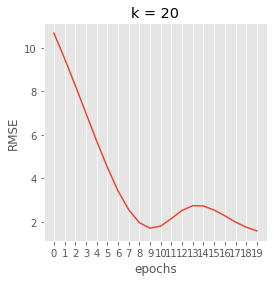

In [ ]:
x = [x for x, y in train_mse_hybrid]
y = [y for x, y in train_mse_hybrid]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 20")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

##Hybrid Model with Latent feature K=30

In [ ]:
model_hybrid_30 = NeuralNet(num_users_hybrid, num_movie_items_hybrid, emb_size=30)
model_hybrid_30

NeuralNet(
  (user_emb): Embedding(75484, 30)
  (item_emb): Embedding(75484, 30)
  (layer1): Linear(in_features=80, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
)

In [ ]:
train_mse_hybrid = []
train_epocs_hybrid(model_hybrid_30, epochs=20, lr=0.01, wd=1e-6, unsqueeze=True) 

Iteration: 10 ; error = 1.5719
Iteration: 20 ; error = 1.5447
test loss 1.375 


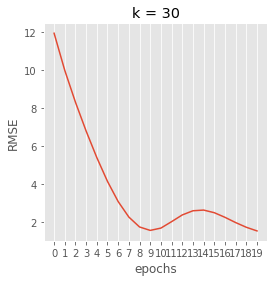

In [ ]:
x = [x for x, y in train_mse_hybrid]
y = [y for x, y in train_mse_hybrid]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 30")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

##Hybrid Model with latent feature K = 40

In [ ]:
model_hybrid_40 = NeuralNet(num_users_hybrid, num_movie_items_hybrid, emb_size=40)
model_hybrid_40

NeuralNet(
  (user_emb): Embedding(75484, 40)
  (item_emb): Embedding(75484, 40)
  (layer1): Linear(in_features=100, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
)

In [ ]:
train_mse_hybrid = []
train_epocs_hybrid(model_hybrid_40, epochs=20, lr=0.01, wd=1e-6, unsqueeze=True) 

Iteration: 10 ; error = 1.7063
Iteration: 20 ; error = 1.8264
test loss 1.533 


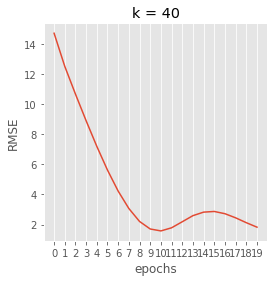

In [ ]:
x = [x for x, y in train_mse_hybrid]
y = [y for x, y in train_mse_hybrid]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 40")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

##Hybrid Model with latent feature K= 50

In [ ]:
model_hybrid_50 = NeuralNet(num_users_hybrid, num_movie_items_hybrid, emb_size=50)
model_hybrid_50

NeuralNet(
  (user_emb): Embedding(75484, 50)
  (item_emb): Embedding(75484, 50)
  (layer1): Linear(in_features=120, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
)

In [ ]:
train_mse_hybrid = []
train_epocs_hybrid(model_hybrid_50, epochs=20, lr=0.01, wd=1e-6, unsqueeze=True) 

Iteration: 10 ; error = 2.8373
Iteration: 20 ; error = 1.5824
test loss 1.665 


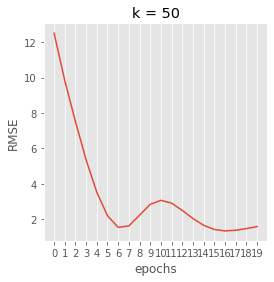

In [ ]:
x = [x for x, y in train_mse_hybrid]
y = [y for x, y in train_mse_hybrid]
plt.figure(figsize=((4,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.title("k = 50")
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.grid(axis="y")

###Hybrid model with latent feature K=50 is seems to be best as it have less mse error 

##Model prediction

##Top 10 recomendation for user 5

In [ ]:
npRecommend_10 = data_new[data_new.userid == 5].to_numpy()

In [ ]:
npRecommend_val = model_hybrid_50(torch.LongTensor(npRecommend_10[:,0]),torch.LongTensor(npRecommend_10)).detach().numpy().reshape(-1)
npRecommend_val

array([2.989381 , 3.082156 , 2.9909637, 2.846424 , 2.8038921, 2.9935336,
       2.8881772, 2.6833498, 3.0495596, 2.9319587, 2.9174373, 2.985741 ,
       2.771784 , 3.2113135, 2.835017 , 3.2937462, 3.4560475, 3.1135643,
       2.575278 , 3.1349945, 2.9184022, 2.9108078, 3.371413 , 3.3679197,
       2.7468328, 3.0098593, 3.3026927, 3.1373599, 2.972202 , 3.153341 ,
       3.0121794, 3.0227969, 3.2259262, 2.833944 , 3.3421366, 2.9897761,
       3.2334583, 3.1185281, 3.2721658, 3.3522203, 2.8246787, 2.8866577,
       2.9095175, 3.1282377, 3.3491385, 3.2770655, 2.8383942, 2.7958362,
       3.003688 , 3.0129805, 2.8641188, 2.8395286, 3.3082094, 2.626707 ,
       2.962485 , 2.974653 , 3.2527335, 2.9176252, 3.0525434, 3.0216367,
       2.9059846, 3.0458653, 2.980695 , 3.227473 , 3.1933658, 2.703653 ,
       3.0986316, 2.819263 , 2.6414695, 2.9321978, 3.201792 , 3.2344217,
       2.595606 , 3.1423736, 2.9763103, 3.0214987, 2.8515403, 3.0770824,
       3.0821667, 2.7355292, 3.193614 , 2.8238506, 

In [ ]:
indecies =  np.argsort(npRecommend_val)[-10:][::-1]
indecies

array([ 82, 126, 131, 108, 119,  16,  22,  23,  39,  44])

In [ ]:
recommded_itemid_10_hybrid = u_data['itemid'].unique()[indecies]  # taking top 10
print(recommded_itemid_10_hybrid)

[ 403  368  756  514 1147  387  144  118   16  201]


In [ ]:
recommendedMovies_10_hybrid = items_data[items_data.movie_id.isin(recommded_itemid_10_hybrid)]
top10k_hybrid = pd.DataFrame(recommendedMovies_10_hybrid['movie_title'])
top10k_hybrid =top10k_hybrid.reset_index(drop=True)
top10k_hybrid = top10k_hybrid.reset_index()
top10k_hybrid = top10k_hybrid.rename(columns={'index':'top 10'})
px.line(top10k_hybrid,x='top 10',y='movie_title',width=600)

### Top 20 Hybrid Model recommedation for the user 5

In [ ]:
npRecommend_20 = data_new[data_new.userid == 5].to_numpy()

In [ ]:
npRecommend_val_20 = model_hybrid_50(torch.LongTensor(npRecommend_20[:,0]),torch.LongTensor(npRecommend_20)).detach().numpy().reshape(-1)
npRecommend_val_20

array([2.989381 , 3.082156 , 2.9909637, 2.846424 , 2.8038921, 2.9935336,
       2.8881772, 2.6833498, 3.0495596, 2.9319587, 2.9174373, 2.985741 ,
       2.771784 , 3.2113135, 2.835017 , 3.2937462, 3.4560475, 3.1135643,
       2.575278 , 3.1349945, 2.9184022, 2.9108078, 3.371413 , 3.3679197,
       2.7468328, 3.0098593, 3.3026927, 3.1373599, 2.972202 , 3.153341 ,
       3.0121794, 3.0227969, 3.2259262, 2.833944 , 3.3421366, 2.9897761,
       3.2334583, 3.1185281, 3.2721658, 3.3522203, 2.8246787, 2.8866577,
       2.9095175, 3.1282377, 3.3491385, 3.2770655, 2.8383942, 2.7958362,
       3.003688 , 3.0129805, 2.8641188, 2.8395286, 3.3082094, 2.626707 ,
       2.962485 , 2.974653 , 3.2527335, 2.9176252, 3.0525434, 3.0216367,
       2.9059846, 3.0458653, 2.980695 , 3.227473 , 3.1933658, 2.703653 ,
       3.0986316, 2.819263 , 2.6414695, 2.9321978, 3.201792 , 3.2344217,
       2.595606 , 3.1423736, 2.9763103, 3.0214987, 2.8515403, 3.0770824,
       3.0821667, 2.7355292, 3.193614 , 2.8238506, 

In [ ]:
indecies_20 =  np.argsort(npRecommend_val_20)[-20:][::-1]
indecies_20

array([ 82, 126, 131, 108, 119,  16,  22,  23,  39,  44,  34, 148,  52,
        26,  15,  45,  38,  56, 106,  71])

In [ ]:
recommded_itemid_20_hybrid = u_data['itemid'].unique()[indecies_20]  # taking top 10
print(recommded_itemid_20_hybrid)

[ 403  368  756  514 1147  387  144  118   16  201  194  137  181   95
  785 1137   32  143   21  165]


In [ ]:
recommendedMovies_20_hybrid = items_data[items_data.movie_id.isin(recommded_itemid_20_hybrid)]
top20k_hybrid = pd.DataFrame(recommendedMovies_20_hybrid['movie_title'])
top20k_hybrid =top20k_hybrid.reset_index(drop=True)
top20k_hybrid = top20k_hybrid.reset_index()
top20k_hybrid = top20k_hybrid.rename(columns={'index':'top 20'})
px.line(top20k_hybrid,x='top 20',y='movie_title',width=600)

##EVALUATION METRICS 

###RMSE AND MAE 

In [ ]:
#We can choose matrix factorization model with latent vector 50. 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [ ]:
#user 5 reccomendation 

y_pred_user5 = npRecommend_val #model with k=50
y_true_user5 = npRecommend_10[:,2]

In [ ]:
mean_squared_error(y_true_user5,y_pred_user5)

1.7236776795953006

In [ ]:
mean_absolute_error(y_pred_user5,y_true_user5)

1.0812023951683516

###Precison, Recall and F1 Score for the top 10 and top 20 matrix factorization recommendation system

###These metrics are Binary classifcation evaluation metrics and have to be converted the rating to 0 or 1. 
###The threshold we set to make the movie items are valid or invalid is 3

###If the rating val is greater than 3.0 the movie item is valid to user therwise invalid.

### Valid movie items are already known in the data set
###Valid movie item: Has a True/Actual rating >= 3
###Invalid item: Has a True/Actual rating < 3
###Recommended items are generated by recommendation algorithm
###Recommended movie item: has a predicted rating >= 3
###Not recommended item: Has a predicted rating < 3

###For top k recommend algorithm the formula for precison ,recall and f1score is 

### Precision@k = (recommended items @k that are valid) / (recommended items @k)

###Recall@k = (recommended movie items @k that are valid) / (total of valid items)

###f1 score = 2*((precison * recall)/(precison +recall))

In [ ]:
user_5_df = data_new[data_new.userid == 5]
recommend_validity = user_5_df[user_5_df.movie_id.isin(recommded_itemid_10_hybrid)]
recommend_validity = recommend_validity[recommend_validity['rating'] >=3]
recommend_validity['rating'].count()#top10 user 5 valid recommeded movies 

3

In [ ]:
recommend_validity

,userid,movie_id,rating,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sentiment_score
2470,5,387,3,26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.387240
2885,5,144,3,332,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.021895
13030,5,403,3,112,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.032304


In [ ]:
no_of_recommeded_item = 0

for i in indecies:
  try:
    if(npRecommend_val[i] >=3):
      no_of_recommeded_item +=1
      print(u_data['itemid'][i])
  except:
    continue
  



480
195
135
174
514
387
144
118
32
327


In [ ]:
no_of_recommeded_item

10

In [ ]:
#number of valid aitem @top10 = 2
#number of recommended item @top10 = 10
#number of reccomeded and valid item @top10 is 0ie 1, 
#Precision@10 =(# of recommended items that are relevant @10)/(# of recommended  items at 10)
#1/10 = 10%


#Recall@10 = (recommended items that are relevant @10)/(total # of relevant items)
#1/2 = 50.00%

#f1_score = 0.16

In [ ]:
#rmse and mae

user_5_df = data_new[data_new.userid == 5]
u_nump = user_5_df.to_numpy()[:,2]

valid_rating_10 = []

for i in indecies:
  try:
    valid_rating_10.append(u_nump[i])
  except:
    valid_rating_10.append(0)
    continue

In [ ]:
pred_rating_10 = []

for i in indecies:
  try:
    pred_rating_10.append(npRecommend_val[i])
  except:
    pred_rating_10.append(0)
    continue

In [ ]:
len(pred_rating_10),len(valid_rating_10)

(10, 10)

In [ ]:
mean_squared_error(pred_rating_10,valid_rating_10)

0.9433529683760696

In [ ]:
mean_absolute_error(pred_rating_10,valid_rating_10)

0.726856017112732

###Top 20 Hybrid recommeder model  for user5 metrics

In [ ]:
user_5_df = data_new[data_new.userid == 5]
recommend_validity_20 = user_5_df[user_5_df.movie_id.isin(recommded_itemid_20_hybrid)]
recommend_validity_20 = recommend_validity_20[recommend_validity_20['rating'] >=3]
recommend_validity_20['rating'].count()#top20 user 5 valid recommeded movies 

8

In [ ]:
no_of_recommeded_item = 0

for i in indecies_20:
  try:
    if(npRecommend_val_20[i] >=3):
      no_of_recommeded_item +=1
      print(u_data['itemid'][i])
  except:
    continue

480
195
135
174
514
387
144
118
32
327
194
787
322
95
785
201
796
384
496
15


In [ ]:
no_of_recommeded_item

20

In [ ]:
recommend_validity_20

,userid,movie_id,rating,movie_title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sentiment_score
2470,5,387,3,26,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.387240
2885,5,144,3,332,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.021895
4153,5,95,4,32,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0.161976
5913,5,194,4,1110,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-0.064308
8726,5,181,5,975,0,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,-0.126219
9296,5,143,3,1076,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.230496
13030,5,403,3,112,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.032304
18101,5,21,3,804,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0.337175


In [ ]:
#rmse and mae

user_5_df = data_new[data_new.userid == 5]
u_nump = user_5_df.to_numpy()[:,2]

valid_rating = []

for i in indecies_20:
  try:
    valid_rating.append(u_nump[i])
  except:
    valid_rating.append(0)
    continue
# recommend_validity_20_rmse = user_5_df[user_5_df.movie_id.isin(recommded_itemid_20_hybrid)]
# actual_ratings = recommend_validity_20_rmse['rating']
# actual_ratings

In [ ]:
len(valid_rating)

20

In [ ]:
pred_rating = []

for i in indecies_20:
  try:
    pred_rating.append(npRecommend_val_20[i])
  except:
    pred_rating.append(0)
    continue

In [ ]:
len(pred_rating)

20

In [ ]:
#rmse
mean_squared_error(pred_rating,valid_rating)

1.720114802179117

In [ ]:
#mean absolute error
mean_absolute_error(pred_rating,valid_rating)

1.0591198086738587

In [ ]:
#number of valid aitem @top20 = 5
#number of recommended item @top20 = 20
#number of reccomeded and valid item @top20 is 1 
#Precision@20 =(# of recommended items that are valid @10)/(# of recommended  items at 20)
# 1/20 = .05


#Recall@20 = (recommended items that are valid @20)/(total # of relevant items)
#1/5 = 20%

#f1_score = 0.08